## **Introducción a K-Nearest Neighbors (KNN)**  

**K-Nearest Neighbors (KNN)** es uno de los algoritmos más simples y versátiles en *Machine Learning*, utilizado tanto para **clasificación** como para **regresión**. Su principio fundamental es:  

> *"Dime con quién andas, y te diré quién eres."*  

Es decir, KNN predice la clase o valor de un dato nuevo basándose en los **"K vecinos más cercanos"** en el conjunto de entrenamiento.  

### **¿Dónde se usa KNN?**  
- Diagnóstico médico (clasificación de enfermedades).  
- Sistemas de recomendación ("usuarios similares a ti compraron...").  
- Reconocimiento de patrones (imágenes, texto).  

---

## **Teoría de KNN**  

### **1. ¿Cómo funciona KNN?**  
1. **Calcula la distancia** entre el nuevo dato y todos los puntos en el conjunto de entrenamiento.  
2. **Selecciona los K vecinos más cercanos** (donde `K` es un número elegido por el usuario).  
3. **Predice** la clase (en clasificación) o el valor (en regresión) basándose en estos vecinos:  
   - **Clasificación**: Mayoría de votos (la clase más común entre los K vecinos).  
   - **Regresión**: Promedio de los valores de los K vecinos.  

### **2. Distancias comunes en KNN**  
La elección de la métrica de distancia afecta el rendimiento del modelo:  
- **Distancia Euclidiana** (la más usada):  
  $$
  d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
  $$  
- **Distancia Manhattan (L1)**:  
  $$
  d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} |x_i - y_i|
  $$  
- **Distancia de Minkowski** (generalización de las dos anteriores).  

### **3. ¿Cómo elegir el valor de K?**  
- **K muy pequeño (ej. K=1)**: Modelo muy flexible, pero propenso a *overfitting* (ruido).  
- **K muy grande (ej. K=N)**: Modelo muy rígido, puede perder patrones (*underfitting*).  
- **Método óptimo**: Usar validación cruzada (*cross-validation*) para probar diferentes valores de K.  

### **4. Ventajas y Desventajas**  
**Ventajas**:  
- Simple de entender e implementar.  
- No asume una distribución de los datos (no paramétrico).  
- Funciona bien con datos no lineales.  

**Desventajas**:  
- Costoso computacionalmente (calcula distancias con todos los datos).  
- Sensible a datos no normalizados (requiere escalado de características).  
- No funciona bien con datos de alta dimensionalidad (*curse of dimensionality*).  

### **Explicación del Código**  
1. **Escalado**: KNN es sensible a la escala, por eso usamos `StandardScaler()`.  
2. **Entrenamiento**: `KNeighborsClassifier` ajusta el modelo con `n_neighbors=3`.  
3. **Predicción**: El modelo clasifica nuevos puntos basándose en sus 3 vecinos más cercanos.  
4. **Métrica**: Usamos `accuracy_score` para evaluar la precisión.  

---

## **Conclusión**  
KNN es un algoritmo intuitivo pero poderoso, ideal para problemas con relaciones no lineales. Su rendimiento depende críticamente de:  
- La elección de **K**.  
- La **métrica de distancia**.  
- El **preprocesamiento** (escalado de características).  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter #Permite determinar la moda o el dato más común
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data_knn.csv') #lectura del dataset que vamos a usar
data #Imprimimos el dataset usado

,x1,x2,y
0,4.200933,5.963915,0
1,2.457364,5.397918,0
2,0.149823,4.148300,0
3,2.336371,5.367687,0
4,2.423015,4.442274,0
...,...,...,...
2995,4.189197,1.499699,2
2996,2.127462,0.310280,2
2997,2.152443,1.207130,2
2998,2.350332,0.641527,2


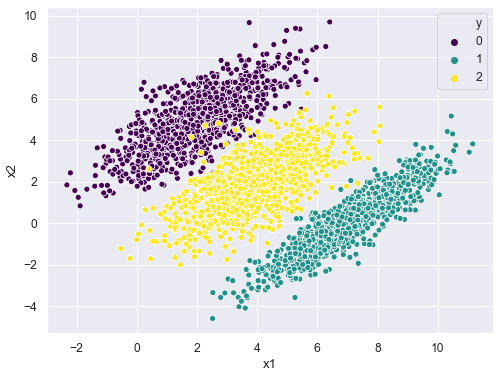

In [3]:
#de los datos de entrenamiento gráficamos para ver los clusters que se presentan en nuestro dataset
plt.figure(figsize=(8,6)) #Tamaño de la figura
sns.set(font_scale=1.1)#Tamaño de la letre
sns.scatterplot(data=data,x='x1',y='x2',hue='y',palette='viridis')#Definimos un grafico tipo scatter de nuestros datos usando 
#seaborn que está mejor creado para mostrar clusters
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,:-1].values, data.iloc[:,-1].values, test_size=0.3, random_state=7) #X train son la posición de x1 y x2 de los 
    #datos de entrenamiento y Y es la clasificación de los datos de entrenamiento
    #Funciona de igual forma para los datos de prueba
    #iloc lo que hace es traerme de un conjunto de datos una columna, fila o elemento en específico en este caso me trae todas las filas
    #excepto la última para llevarlo a x, y la segunda me trae solo la última columna esto de lo asigna a la y
    # train_test_splt me busca valores random para usar para el entrenamiento 
X_train

array([[ 4.67381058, -3.00818738],
       [ 5.77926115, -1.33216296],
       [ 9.86759567,  2.0006581 ],
       ...,
       [ 3.60416956,  7.06819636],
       [ 6.88453714, -0.0860722 ],
       [ 0.5039905 ,  4.89425745]])

In [10]:
class KNN:
    def __init__(self, k): #definimos el contructor de nuestra clase 
        self.k = k
        
    def fit(self, X_train, y_train):
        self.X_train = X_train #Asingo los datos de entrada a un atributo de la clase
        self.y_train = y_train
        return self
    
    def predict(self, X_test):
        predictions = [] #Se crea una lista para guardar los datos de las predicciones 
        for row in X_test:

            idx_knn = np.linalg.norm(self.X_train-row, axis=1).argsort()[:self.k] #Organizar los datos de distancia 
            #print(np.linalg.norm(self.X_train-row, axis=1)[idx_knn])
            most_common_Y = Counter(self.y_train[idx_knn]).most_common()[0][0] #El cluster o clasificación más común
            predictions.append(most_common_Y) 
        return np.array(predictions)
    
    def score(self, X_test, Y_test):
        return (self.predict(X_test) == Y_test).sum()/Y_test.shape[0]

In [9]:

lista2=np.array((40,50,70,10,40,50,10))
lista2.argsort()

array([3, 6, 0, 4, 1, 5, 2], dtype=int64)

In [12]:
knn = KNN(k=3).fit(X_train,y_train)

Mean Accuracy: 0.991


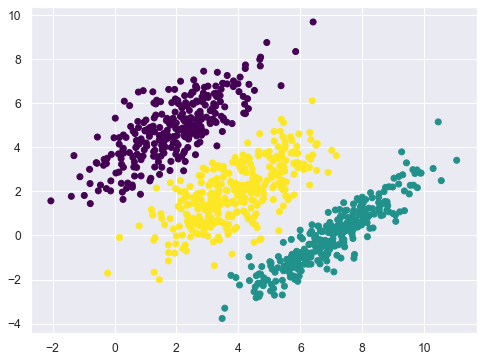

In [13]:
score = knn.score(X_test,y_test)
print("Mean Accuracy:",round(score,3))
predictions = knn.predict(X_test)
plt.figure(figsize=(8,6))
plt.scatter(*X_test.T,c=predictions,cmap='viridis')
plt.show()

Mean Accuracy: 0.992


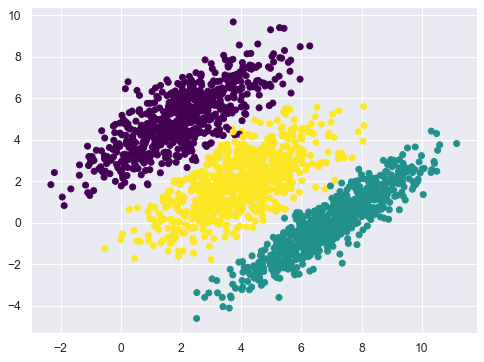

In [14]:
score = knn.score(X_train,y_train)
print("Mean Accuracy:",round(score,3))
predictions = knn.predict(X_train)
plt.figure(figsize=(8,6))
plt.scatter(*X_train.T,c=predictions,cmap='viridis')
plt.show()